In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('placement (3).csv')

In [22]:
df.sample(5)

,cgpa,placement_exam_marks,placed
613,6.66,55.0,1
637,7.25,74.0,0
973,6.10,37.0,1
134,6.33,93.0,0
347,7.24,34.0,1


In [24]:
df.shape

(1000, 3)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2584\3792736820.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_2584\3792736820.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


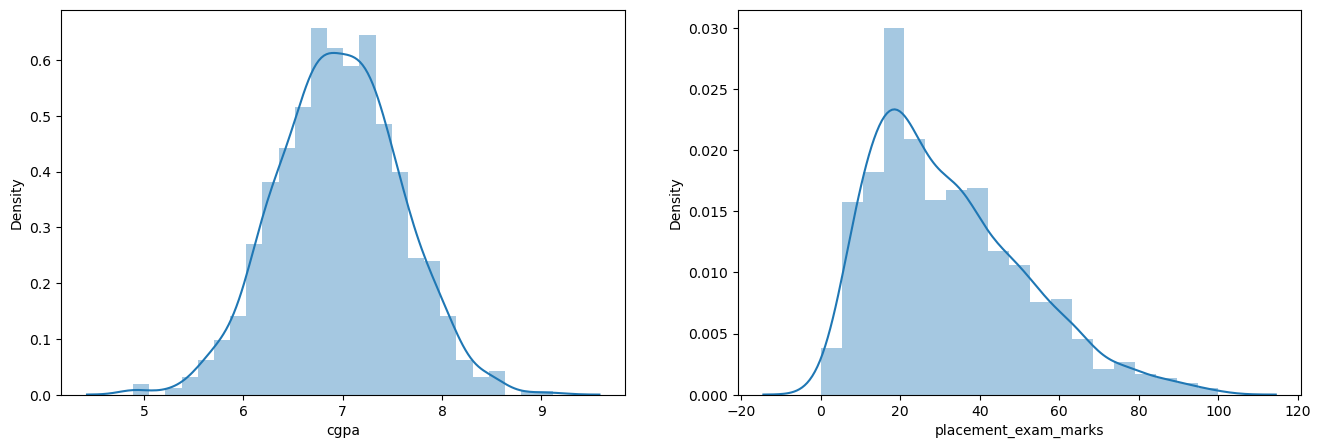

In [26]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [28]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [30]:
df['cgpa'].skew()

-0.014529938929314918

In [32]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

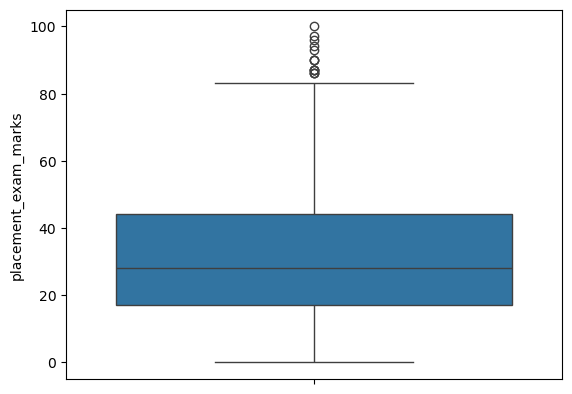

In [34]:
sns.boxplot(df['placement_exam_marks'])

In [36]:
#Finding IQR
percentile25 =df['placement_exam_marks'].quantile(0.25)
percentile75 =df['placement_exam_marks'].quantile(0.75)

In [38]:
percentile75

44.0

In [40]:
percentile25

17.0

In [42]:
iqr = percentile75-percentile25

In [44]:
iqr

27.0

In [46]:
upper_limit = percentile75+1.5*iqr

In [48]:
lower_limit = percentile25 - 1.5*iqr

In [50]:
print('Upper_limit' , upper_limit)
print('lower_limit', lower_limit)

Upper_limit 84.5
lower_limit -23.5


## Finding OUtliers

In [53]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [55]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


## Triming

In [60]:
new_df = df[df['placement_exam_marks']<upper_limit]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [62]:
new_df.shape

(985, 3)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2584\3798459719.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_2584\3798459719.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


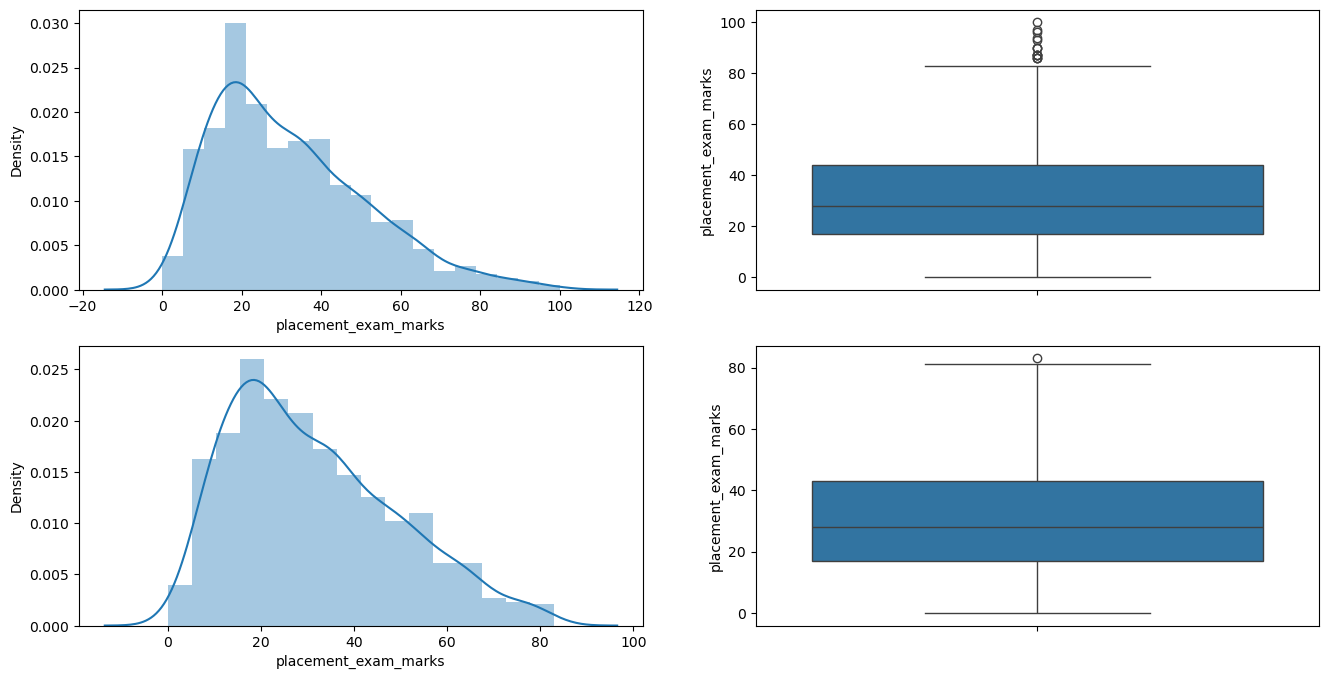

In [64]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

## Capping 

In [79]:
new_df_cap  =df.copy()
new_df_cap['placement_exam_marks']=np.where(
    new_df_cap['placement_exam_marks'] >upper_limit,
    upper_limit,
    np.where(
    new_df_cap['placement_exam_marks'] <lower_limit,
    lower_limit,
    new_df_cap['placement_exam_marks']
)

)

           

In [73]:
new_df_cap.shape

(1000, 3)